In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import os
import pandas as pd
import nltk
import string
import ast
import re
import unidecode

# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter



In [2]:
def ingredient_parser(ingreds):
    """

    This function takes in a list (but it is a string as it comes from pandas dataframe) of
       ingredients and performs some preprocessing.
       For example:

       input = '['1 x 1.6kg whole duck', '2 heaped teaspoons Chinese five-spice powder', '1 clementine',
                 '6 fresh bay leaves', 'GRAVY', '', '1 bulb of garlic', '2 carrots', '2 red onions',
                 '3 tablespoons plain flour', '100 ml Marsala', '1 litre organic chicken stock']'

       output = ['duck', 'chinese five spice powder', 'clementine', 'fresh bay leaf', 'gravy', 'garlic',
                 'carrot', 'red onion', 'plain flour', 'marsala', 'organic chicken stock']

    """
    measures = [
        "teaspoon",
        "t",
        "tsp.",
        "tablespoon",
        "T",
        "tbl.",
        "tb",
        "tbsp.",
        "fluid ounce",
        "fl oz",
        "gill",
        "cup",
        "c",
        "pint",
        "p",
        "pt",
        "fl pt",
        "quart",
        "q",
        "qt",
        "fl qt",
        "gallon",
        "g",
        "gal",
        "ml",
        "milliliter",
        "millilitre",
        "cc",
        "mL",
        "l",
        "liter",
        "litre",
        "L",
        "dl",
        "deciliter",
        "decilitre",
        "dL",
        "bulb",
        "level",
        "heaped",
        "rounded",
        "whole",
        "pinch",
        "medium",
        "slice",
        "pound",
        "lb",
        "#",
        "ounce",
        "oz",
        "mg",
        "milligram",
        "milligramme",
        "g",
        "gram",
        "gramme",
        "kg",
        "kilogram",
        "kilogramme",
        "x",
        "of",
        "mm",
        "millimetre",
        "millimeter",
        "cm",
        "centimeter",
        "centimetre",
        "m",
        "meter",
        "metre",
        "inch",
        "in",
        "milli",
        "centi",
        "deci",
        "hecto",
        "kilo",
    ]
    words_to_remove = [
        "fresh",
        "minced",
        "chopped" "oil",
        "a",
        "red",
        "bunch",
        "and",
        "clove",
        "or",
        "leaf",
        "chilli",
        "large",
        "extra",
        "sprig",
        "ground",
        "handful",
        "free",
        "small",
        "pepper",
        "virgin",
        "range",
        "from",
        "dried",
        "sustainable",
        "black",
        "peeled",
        "higher",
        "welfare",
        "seed",
        "for",
        "finely",
        "freshly",
        "sea",
        "quality",
        "white",
        "ripe",
        "few",
        "piece",
        "source",
        "to",
        "organic",
        "flat",
        "smoked",
        "ginger",
        "sliced",
        "green",
        "picked",
        "the",
        "stick",
        "plain",
        "plus",
        "mixed",
        "mint",
        "bay",
        "basil",
        "your",
        "cumin",
        "optional",
        "fennel",
        "serve",
        "mustard",
        "unsalted",
        "baby",
        "paprika",
        "fat",
        "ask",
        "natural",
        "skin",
        "roughly",
        "into",
        "such",
        "cut",
        "good",
        "brown",
        "grated",
        "trimmed",
        "oregano",
        "powder",
        "yellow",
        "dusting",
        "knob",
        "frozen",
        "on",
        "deseeded",
        "low",
        "runny",
        "balsamic",
        "cooked",
        "streaky",
        "nutmeg",
        "sage",
        "rasher",
        "zest",
        "pin",
        "groundnut",
        "breadcrumb",
        "turmeric",
        "halved",
        "grating",
        "stalk",
        "light",
        "tinned",
        "dry",
        "soft",
        "rocket",
        "bone",
        "colour",
        "washed",
        "skinless",
        "leftover",
        "splash",
        "removed",
        "dijon",
        "thick",
        "big",
        "hot",
        "drained",
        "sized",
        "chestnut",
        "watercress",
        "fishmonger",
        "english",
        "dill",
        "caper",
        "raw",
        "worcestershire",
        "flake",
        "cider",
        "cayenne",
        "tbsp",
        "leg",
        "pine",
        "wild",
        "if",
        "fine",
        "herb",
        "almond",
        "shoulder",
        "cube",
        "dressing",
        "with",
        "chunk",
        "spice",
        "thumb",
        "garam",
        "new",
        "little",
        "punnet",
        "peppercorn",
        "shelled",
        "saffron",
        "other" "chopped",
        "salt",
        "olive",
        "taste",
        "can",
        "sauce",
        "water",
        "diced",
        "package",
        "italian",
        "shredded",
        "divided",
        "parsley",
        "vinegar",
        "all",
        "purpose",
        "crushed",
        "juice",
        "more",
        "coriander",
        "bell",
        "needed",
        "thinly",
        "boneless",
        "half",
        "thyme",
        "cubed",
        "cinnamon",
        "cilantro",
        "jar",
        "seasoning",
        "rosemary",
        "extract",
        "sweet",
        "baking",
        "beaten",
        "heavy",
        "seeded",
        "tin",
        "vanilla",
        "uncooked",
        "crumb",
        "style",
        "thin",
        "nut",
        "coarsely",
        "spring",
        "chili",
        "cornstarch",
        "strip",
        "cardamom",
        "rinsed",
        "honey",
        "cherry",
        "root",
        "quartered",
        "head",
        "softened",
        "container",
        "crumbled",
        "frying",
        "lean",
        "cooking",
        "roasted",
        "warm",
        "whipping",
        "thawed",
        "corn",
        "pitted",
        "sun",
        "kosher",
        "bite",
        "toasted",
        "lasagna",
        "split",
        "melted",
        "degree",
        "lengthwise",
        "romano",
        "packed",
        "pod",
        "anchovy",
        "rom",
        "prepared",
        "juiced",
        "fluid",
        "floret",
        "room",
        "active",
        "seasoned",
        "mix",
        "deveined",
        "lightly",
        "anise",
        "thai",
        "size",
        "unsweetened",
        "torn",
        "wedge",
        "sour",
        "basmati",
        "marinara",
        "dark",
        "temperature",
        "garnish",
        "bouillon",
        "loaf",
        "shell",
        "reggiano",
        "canola",
        "parmigiano",
        "round",
        "canned",
        "ghee",
        "crust",
        "long",
        "broken",
        "ketchup",
        "bulk",
        "cleaned",
        "condensed",
        "sherry",
        "provolone",
        "cold",
        "soda",
        "cottage",
        "spray",
        "tamarind",
        "pecorino",
        "shortening",
        "part",
        "bottle",
        "sodium",
        "cocoa",
        "grain",
        "french",
        "roast",
        "stem",
        "link",
        "firm",
        "asafoetida",
        "mild",
        "dash",
        "boiling",
        "oil",
        "chopped",
        "vegetable oil",
        "chopped oil",
        "garlic",
        "skin off",
        "bone out" "from sustrainable sources",
    ]
    # The ingredient list is now a string so we need to turn it back into a list. We use ast.literal_eval
    if isinstance(ingreds, list):
        ingredients = ingreds
    else:
        ingredients = ast.literal_eval(ingreds)
    # We first get rid of all the punctuation. We make use of str.maketrans. It takes three input
    # arguments 'x', 'y', 'z'. 'x' and 'y' must be equal-length strings and characters in 'x'
    # are replaced by characters in 'y'. 'z' is a string (string.punctuation here) where each character
    #  in the string is mapped to None.
    translator = str.maketrans("", "", string.punctuation)
    lemmatizer = WordNetLemmatizer()
    ingred_list = []
    for i in ingredients:
        i.translate(translator)
        # We split up with hyphens as well as spaces
        items = re.split(" |-", i)
        # Get rid of words containing non alphabet letters
        items = [word for word in items if word.isalpha()]
        # Turn everything to lowercase
        items = [word.lower() for word in items]
        # remove accents
        items = [
            unidecode.unidecode(word) for word in items
        ]  #''.join((c for c in unicodedata.normalize('NFD', items) if unicodedata.category(c) != 'Mn'))
        # Lemmatize words so we can compare words to measuring words
        items = [lemmatizer.lemmatize(word) for word in items]
        # Gets rid of measuring words/phrases, e.g. heaped teaspoon
        items = [word for word in items if word not in measures]
        # Get rid of common easy words
        items = [word for word in items if word not in words_to_remove]
        if items:
            ingred_list.append(" ".join(items))
    # ingred_list = " ".join(ingred_list)
    return ingred_list

In [3]:
data_path = '/Users/namithabhaskar/Downloads/projectDataFolder/df_recipes.csv'
recipe_df = pd.read_csv(data_path)

# recipe_df["ingredients_parsed"] = recipe_df["ingredients"].apply(
#         lambda x: ingredient_parser(x))

# df = recipe_df[["recipe_name", "ingredients_parsed", "ingredients", "recipe_urls"]]
# df = recipe_df.dropna()

# df.to_csv('/Users/namithabhaskar/Downloads/projectDataFolder/updated_data.csv', index=False)

In [4]:
print(recipe_df.info())
print(recipe_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4647 entries, 0 to 4646
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   recipe_urls  4647 non-null   object
 1   recipe_name  4647 non-null   object
 2   ingredients  4647 non-null   object
dtypes: object(3)
memory usage: 109.0+ KB
None
                                         recipe_urls  \
0  https://www.jamieoliver.com/recipes/duck-recip...   
1  https://www.jamieoliver.com/recipes/vegetable-...   
2  https://www.jamieoliver.com/recipes/pasta-reci...   
3  https://www.jamieoliver.com/recipes/vegetable-...   
4  https://www.jamieoliver.com/recipes/chicken-re...   

                     recipe_name  \
0  Roast duck with Marsala gravy   
1     Best-ever Brussels sprouts   
2  Beautiful courgette carbonara   
3     Roasted black bean burgers   
4     Chicken & tofu noodle soup   

                                         ingredients  
0  ['1 x 1.6kg whole duck', '2 he

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

newFile = '/Users/namithabhaskar/Downloads/projectDataFolder/updated_data.csv'

parsed_df = pd.read_csv(newFile)
print(parsed_df.head())

# Tfidf needs unicode or string types
parsed_df['ingredients_parsed'] = parsed_df.ingredients_parsed.values.astype('U')

# TF-IDF feature extractor
tfidf = TfidfVectorizer()
tfidf.fit(parsed_df['ingredients_parsed'])
tfidf_recipe = tfidf.transform(parsed_df['ingredients_parsed'])

                                         recipe_urls  \
0  https://www.jamieoliver.com/recipes/duck-recip...   
1  https://www.jamieoliver.com/recipes/vegetable-...   
2  https://www.jamieoliver.com/recipes/pasta-reci...   
3  https://www.jamieoliver.com/recipes/vegetable-...   
4  https://www.jamieoliver.com/recipes/chicken-re...   

                     recipe_name  \
0  Roast duck with Marsala gravy   
1     Best-ever Brussels sprouts   
2  Beautiful courgette carbonara   
3     Roasted black bean burgers   
4     Chicken & tofu noodle soup   

                                         ingredients  \
0  ['1 x 1.6kg whole duck', '2 heaped teaspoons C...   
1  ['800 g Brussels sprouts', '2 higher-welfare C...   
2  ['6 medium green and yellow courgettes', '500 ...   
3  ['1½ red onions', '200 g mixed mushrooms', '10...   
4  ['2 shallots', '2 cloves of garlic', '2 cm pie...   

                                  ingredients_parsed  
0  ['duck', 'chinese five', 'clementine', 'gravy'...  

In [7]:
print(tfidf_recipe.shape)
print(tfidf_recipe)

(4647, 2004)
  (0, 1698)	0.22618861361041928
  (0, 1180)	0.15859678966230717
  (0, 1044)	0.3342855884220068
  (0, 765)	0.4040550412727411
  (0, 679)	0.1662828582916938
  (0, 665)	0.3586066639904419
  (0, 588)	0.37586274172405865
  (0, 399)	0.41743989502611045
  (0, 364)	0.3108034517442032
  (0, 355)	0.15496819261634281
  (0, 296)	0.2372486397065528
  (1, 1667)	0.38639286960805097
  (1, 1518)	0.2643007565179827
  (1, 1180)	0.17348588207165538
  (1, 599)	0.43775313915002034
  (1, 506)	0.46233841791190533
  (1, 250)	0.19030010674095937
  (1, 235)	0.43775313915002034
  (1, 61)	0.34281444568104075
  (2, 1602)	0.3333442305070572
  (2, 1262)	0.2689936965492684
  (2, 1229)	0.13896377759889916
  (2, 681)	0.3864220479207113
  (2, 603)	0.14796960739709555
  (2, 474)	0.17382842609205773
  :	:
  (4644, 1446)	0.27035420050568637
  (4644, 1252)	0.20525622938090018
  (4644, 1232)	0.3643894695260482
  (4644, 1217)	0.29895775957705334
  (4644, 627)	0.28528819371692427
  (4644, 603)	0.1275301096243588
  

In [8]:
# calculate cosine similarity between actual recipe ingreds and test ingreds

from sklearn.metrics.pairwise import cosine_similarity

cos_sim = map(lambda x: cosine_similarity(tfidf_recipe, x), tfidf_recipe)
scores = list(cos_sim)

In [9]:
print(scores[1].shape)

(4647, 1)


In [10]:
# Top-N recomendations order by score
def get_recommendations(N, scores):
    
    # order the scores with and filter to get the highest N scores
    top = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:N]
    # create dataframe to load in recommendations
    recommendation = pd.DataFrame(columns=["recipe", "ingredients", "score", "url"])
    count = 0
    for i in top:
        recommendation.at[count, "recipe"] = title_parser(parsed_df["recipe_name"][i])
        recommendation.at[count, "ingredients"] = ingredient_parser_final(
            parsed_df["ingredients"][i]
        )
        recommendation.at[count, "url"] = parsed_df["recipe_urls"][i]
        recommendation.at[count, "score"] = "{:.3f}".format(float(scores[i]))
        count += 1
    return recommendation

In [11]:
# neaten the ingredients being outputted

def ingredient_parser_final(ingredient):
    if isinstance(ingredient, list):
        ingredients = ingredient
    else:
        ingredients = ast.literal_eval(ingredient)

    ingredients = ",".join(ingredients)
    ingredients = unidecode.unidecode(ingredients)
    return ingredients


def title_parser(title):
    title = unidecode.unidecode(title)
    return title


In [12]:
def RecSys(ingredients, N=5):
    """
    The reccomendation system takes in a list of ingredients and returns a list of top 5 
    recipes based of of cosine similarity. 
    :param ingredients: a list of ingredients
    :param N: the number of reccomendations returned 
    :return: top 5 reccomendations for cooking recipes
    """

    # parse the ingredients using my ingredient_parser
    try:
        ingredients_parsed = ingredient_parser(ingredients)
    except:
        ingredients_parsed = ingredient_parser([ingredients])

    # use our pretrained tfidf model to encode our input ingredients
    ingredients_parsed = " ".join(ingredients_parsed)
    ingredients_tfidf = tfidf.transform([ingredients_parsed])

    # calculate cosine similarity between actual recipe ingreds and test ingreds
    cos_sim = map(lambda x: cosine_similarity(ingredients_tfidf, x), tfidf_recipe)
    scores = list(cos_sim)

    # Filter top N recommendations
    recommendations = get_recommendations(N, scores)
    return recommendations

In [13]:
# test ingredients
test_ingredients1 = "ground beef, pasta, spaghetti, tomato pasta sauce, bacon, onion, zucchini, and, cheese"
test_ingredients2 = "shallot, chicken thigh, sesame, soy, rice noodle, tofu, onion, spinach, seaweed nori sheet, lime"
recs = RecSys(test_ingredients1)

pd.set_option('display.max_colwidth', None)
print(recs)

                                           recipe  \
0   Spaghetti Pasta Sauce Recipe - Allrecipes.com   
1     Zucchini and Shells Recipe - Allrecipes.com   
2  Ricotta Stuffed Squash Recipe - Allrecipes.com   
3      Meatball Casserole Recipe - Allrecipes.com   
4        Stringy Macaroni Recipe - Allrecipes.com   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ingredients  \
0                                                                                                                                                                                                

In [14]:
recipeNames = recs['recipe'].tolist()

cleaned_recipes = [recipe.replace(' Recipe - Allrecipes.com', '') for recipe in recipeNames]
for names in cleaned_recipes:
    print(names)

Spaghetti Pasta Sauce
Zucchini and Shells
Ricotta Stuffed Squash
Meatball Casserole
Stringy Macaroni


In [18]:
import torch
print(torch.__version__)

2.2.2


In [19]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "dreamlike-art/dreamlike-photoreal-2.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [21]:
import torch
from diffusers import StableDiffusionPipeline

# Load the pre-trained model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


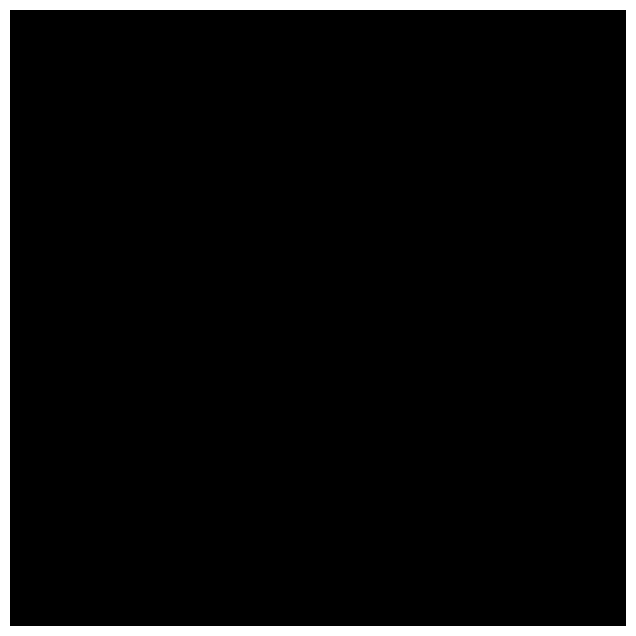

  0%|          | 0/50 [00:00<?, ?it/s]

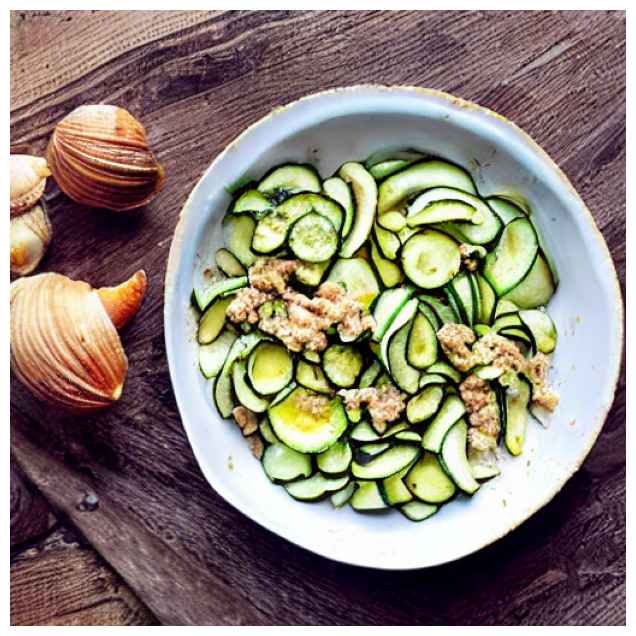

  0%|          | 0/50 [00:00<?, ?it/s]

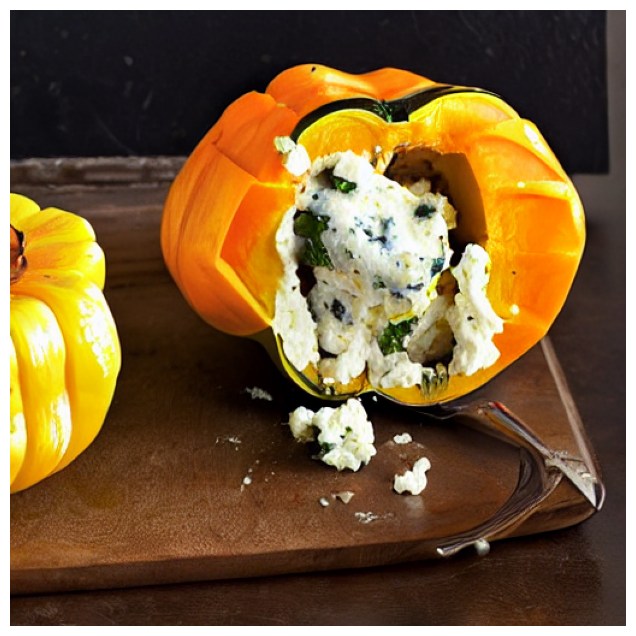

  0%|          | 0/50 [00:00<?, ?it/s]

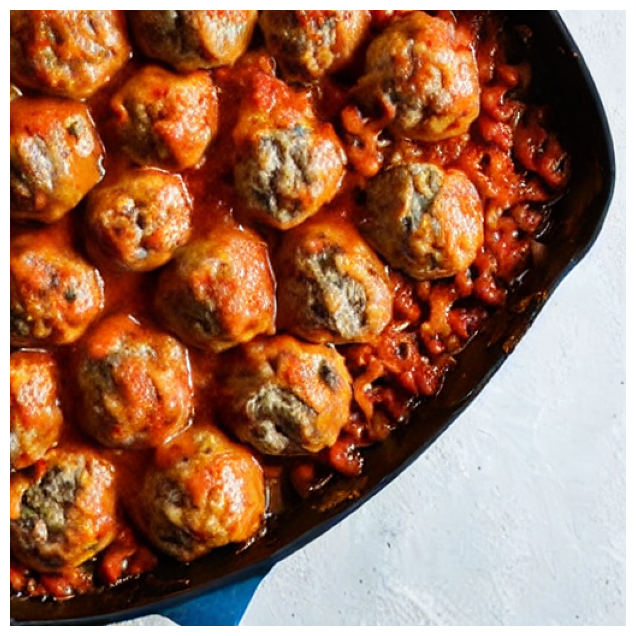

  0%|          | 0/50 [00:00<?, ?it/s]

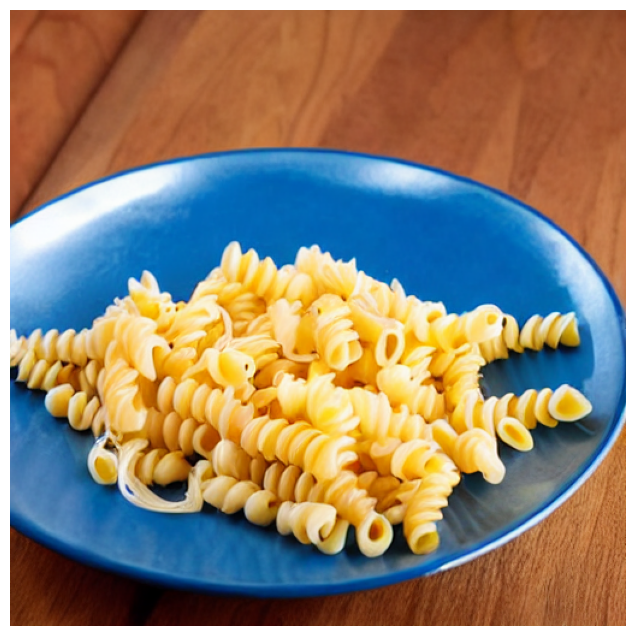

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def display_image(image):
    """
    Displays the given image using Matplotlib.

    Args:
        image (PIL.Image.Image or np.ndarray): The image to be displayed.
    """
    if isinstance(image, Image.Image):
        # Convert PIL Image to numpy array
        image = np.array(image)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display the image
    ax.imshow(image)
    ax.axis('off')  # Remove axis ticks

    # Show the image
    plt.show()


for recipe_name in cleaned_recipes:
    image = pipe(recipe_name, num_inference_steps=50)["images"][0]
    # Display or save the generated image
    display_image(image)